In [1]:
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math as ma
warnings.filterwarnings("ignore")

In [2]:
dat=pd.ExcelFile("KPM.xlsx")

In [3]:
ncc=pd.read_excel(dat,'NewCustomerList')

In [4]:
ncc

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,AGE
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.86,1.0750,1.343750,1.142187,1,1,1.718750,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.71,0.7100,0.887500,0.754375,1,1,1.718750,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.53,0.5300,0.530000,0.530000,1,1,1.718750,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.93,1.1625,1.162500,1.162500,4,4,1.703125,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.96,0.9600,1.200000,1.200000,4,4,1.703125,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,1.05,1.0500,1.050000,1.050000,996,996,0.374000,62
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.72,0.7200,0.900000,0.765000,997,997,0.357000,20
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.40,0.5000,0.500000,0.500000,997,997,0.357000,67
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,0.78,0.9750,0.975000,0.828750,997,997,0.357000,69


In [5]:
ncc.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [6]:
ncc.shape

(1000, 19)

In [7]:
ncc['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

##### The target audience for our marketing and advertising should be inclined to provide focus on females than males.

In [8]:
ncc

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,AGE
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,62
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,20
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,67
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,69


In [9]:
ncc['agegroup'] = pd.cut(ncc['AGE'], bins=[9, 20, 30, 40, 50, 60,70,80,90,100], 
               labels=['10-19', '20-29', '30-39', '40-49', '50-59','60-69','70-79','80-89','90-99'])
ncc

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,AGE,agegroup
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51,50-59
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47,40-49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42,40-49
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,62,60-69
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,20,10-19
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,67,60-69
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,69,60-69


In [10]:
ncc.to_excel("output.xlsx")

In [11]:
vf= pd.crosstab(ncc.agegroup, ncc.gender)
vf

gender,Female,Male
agegroup,,
10-19,5,6
20-29,77,90
30-39,54,50
40-49,129,98
50-59,89,82
60-69,92,82
70-79,45,47
80-89,22,15


#### Customers are mostly from 40-50 followed by 60-69,50-59 range who bought bicycle 

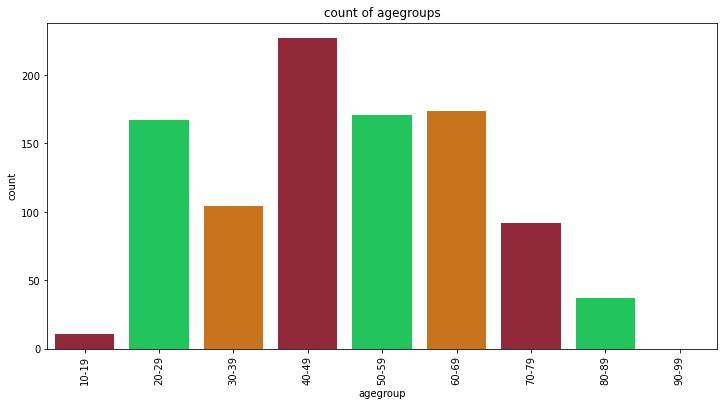

In [13]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'agegroup', data = ncc, palette= ["#a31830","#07e053", "#e37500"])
plt.title('count of agegroups')
plt.xticks(rotation = 90);

In [17]:
st_df = ncc[ncc['gender']=='Male']
art_df=sum(st_df['past_3_years_bike_related_purchases'])
art_df

23765

In [18]:
sq_df = ncc[ncc['gender']=='Female']
ar_df=sum(sq_df['past_3_years_bike_related_purchases'])
ar_df

25212

In [19]:
data = {"gender":['Male','Female'],"past_3_years_bike_related_purchases":[23765,25212]};

In [21]:
dat = pd.DataFrame(data=data);
dat

,gender,past_3_years_bike_related_purchases
0,Male,23765
1,Female,25212


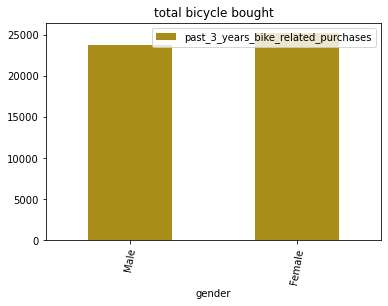

In [23]:
dat.plot.bar(x="gender", y="past_3_years_bike_related_purchases",color='#a98d19', rot=80, title="total bicycle bought");
plt.show(block=True);

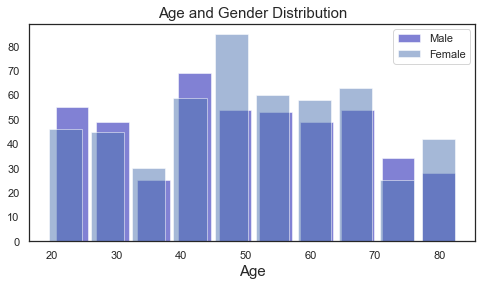

In [56]:
plt.figure(figsize=[8,4])
plt.hist('AGE', data=ncc[ncc['gender'] == 'Male'], alpha=0.5, label='Male', color = '#0504aa',
        rwidth = 0.8);
plt.hist('AGE', data=ncc[ncc['gender'] == 'Female'], alpha=0.5, label='Female',
        rwidth = 0.8);
plt.title('Age and Gender Distribution', fontsize = 15);
plt.xlabel('Age', fontsize = 15);
plt.legend();

##### The Males are seen to be younger in this data , majority of Females fall in the middle and majority of the distribution . Number of aged Females are more than the aged Males 

In [27]:
def Plots(x, color, title, xlab, ylab, *size):
    plt.figure(figsize=size)
    sns.countplot(x=x, data=ncc, color = color);
    plt.title(title, fontsize = 15);
    plt.xlabel(xlab, fontsize = 15);
    plt.ylabel(ylab, fontsize = 15)
    plt.tight_layout()

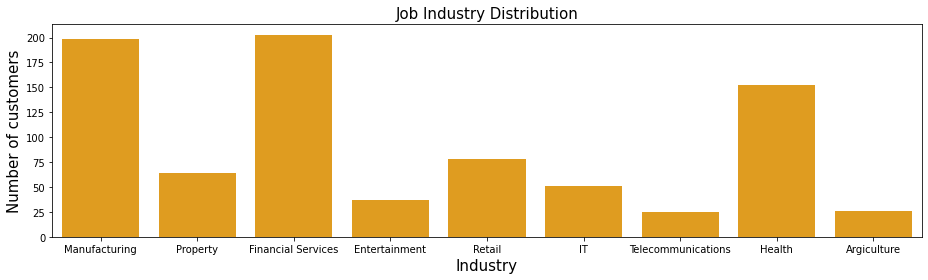

In [28]:
Plots("job_industry_category","orange","Job Industry Distribution","Industry","Number of customers",13,4)

#### There are a major number of customers under Manufacturing and Financial Services followed by Health,and  number of customers under Telecommunications followed by Agriculture are the least.

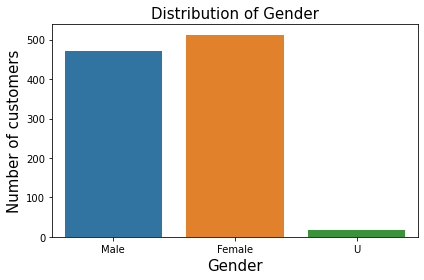

In [29]:
plt.figure(figsize=[6,4])
sns.countplot(x='gender', data=ncc);
plt.title('Distribution of Gender', fontsize = 15);
plt.xlabel('Gender', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

##### As per the data being provided, it is seen that there are a greater number of Females than other genders 

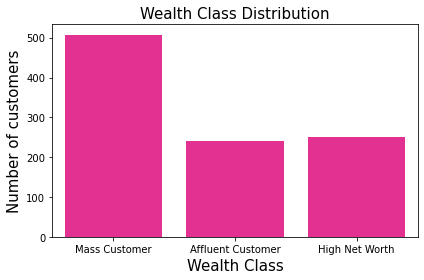

In [30]:
Plots("wealth_segment","deeppink","Wealth Class Distribution","Wealth Class","Number of customers",6,4)

#### There are a major number of customers under Mass Customer followed by High New Worth Customers, the number of customers under Affleunt Customers and High New Worth Customers are almost equal   

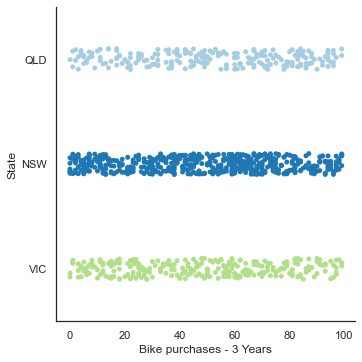

In [42]:
ax = sns.catplot(y="state",x="past_3_years_bike_related_purchases",data=ncc, palette="Paired")
ax.set(xlabel="Bike purchases - 3 Years", ylabel = "State")

#### The customers from New South Wales has the most purchase rate than the remaining states.The Queensland along with the Victoria data are unreliable for analysis due to less data-points.There are less data points from Victoria hence the distribution is highly spread out with a huge Error .The data-points from NSW are more tighter  and  reliable with less Error

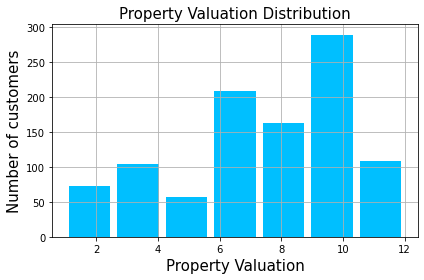

In [33]:
fig = plt.figure(figsize = (6,4))
axes = fig.gca()
ncc.hist('property_valuation', bins=7, ax=axes, color='deepskyblue', rwidth=0.85, alpha=1);
plt.title('Property Valuation Distribution', fontsize = 15);
plt.xlabel('Property Valuation', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

#### Majority of the customers in the data have a property valuation ranging between 7 - 8 ,Property valuation between 4 - 6 are the least 

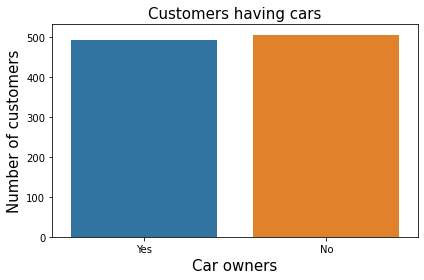

In [34]:
plt.figure(figsize=[6,4])
sns.countplot(x='owns_car', data=ncc);
plt.title('Customers having cars', fontsize = 15);
plt.xlabel('Car owners', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

[Text(0.5, 0, 'Bike purchases - 3 Years'), Text(0, 0.5, 'Job Industry')]

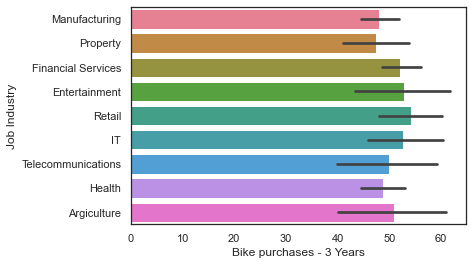

In [46]:
ax = sns.barplot(y="job_industry_category", x="past_3_years_bike_related_purchases", 
                 data=ncc, palette="husl")
ax.set(xlabel="Bike purchases - 3 Years", ylabel = "Job Industry")

##### According to the data, customers who are in Retail sector have invested more on bikes in past 3 years..The customers in Property are the lowest in terms of Mean bike purchase in past 3 years.The Mean purchases among the Entertainment field lies between 0 - 47. The purchases data in the Manufacturing field are more accurately distributed and are more reliable for analysis.The Agriculture purchase data is the least reliable. The distribution is not tight.